In [ ]:
#Atividade III IPOG

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Carregar os dados do CSV
data = {
    'codigo': [34, 167, 6784, 82, 2970, 34197, 5072, 469, 24, 74, 9850, 82343, 20802, 568, 294579, 59375, 80, 66490, 2381, 44803],
    'endereco': ['Rua Desembargador Westphalen', 'Rua Jose Loureiro', 'Rua Jose Loureiro', 'Rua LourenÃ§o Pinto', 'Rua LourenÃ§o Pinto',
                 'Alameda Doutor Muricy', 'Alameda Doutor Muricy', np.nan, 'R. Desembargador Westphalen', 'Avenida Visconde de Guarapuava',
                 'Avenida Visconde de Guarapuava', 'Avenida Sete de Setembro', 'Avenida Sete de Setembro', 'Rua Alferes Poli',
                 'Av. Silva Jardim', 'Avenida Silva Jardim', 'Rua Desembargador Westphalen', 'Rua Desembargador Westphalen',
                 'Rua Rockefeller', 'Rua Rockefeller'],
    'quartos': [2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
    'suite': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, np.nan],
    'area': [90, 64, 81, 50, 63, 80, 84, 30, 60, 132, 64, 45, 47, 43, 36, 33, 80, 80, 54, np.nan],
    'vaga': [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    'aluguel': [900, 650, 1100, 1350, 1300, 900, 1100, 550, 800, 1800, 600, 750, 600, 600, 550, 560, 900, 1100, 900, np.nan],
    'condominio': [371, 428, 1100, 300, 300, 410, 382, 210, 120, 520, 326, 420, 405, 330, 350, 305, 350, 350, 240, np.nan],
    'data': ['11/10/17', '15/07/17', '23/08/17', '19/09/17', '05/08/17', '23/10/17', '02/09/17', '03/07/17', '30/09/17',
             '12/10/17', '15/07/17', 'janeiro 17', '27/07/17', '12/08/17', '01/10/17', '11/09/17', '12/08/17', '29/08/17',
             '19/09/17', '19/07/17']
}
df = pd.DataFrame(data)

# Identificar valores nulos
print("Valores nulos por coluna:\n", df.isnull().sum())

# Tratar valores nulos
# Para 'endereco', preencher com 'Desconhecido'
df['endereco'] = df['endereco'].fillna('Desconhecido')

# Para 'suite', preencher com a mediana (assumindo que é um número inteiro)
df['suite'] = df['suite'].fillna(df['suite'].median()).astype(int)

# Para 'area', preencher com a média
df['area'] = df['area'].fillna(df['area'].mean())

# Para 'aluguel', preencher com a média
df['aluguel'] = df['aluguel'].fillna(df['aluguel'].mean())

# Para 'condominio', preencher com a média
df['condominio'] = df['condominio'].fillna(df['condominio'].mean())

# Verificar e converter tipos de dados
df['data'] = pd.to_datetime(df['data'], errors='coerce', format='%d/%m/%y')

# Discretização de dados
# Vamos discretizar a área em categorias
bins = [0, 50, 100, 150]
labels = ['Pequeno', 'Medio', 'Grande']
df['area_categoria'] = pd.cut(df['area'], bins=bins, labels=labels)

# Salvar o DataFrame limpo
df.to_csv('aluguel-limpo.csv', index=False)

# Normalização dos dados
scaler = MinMaxScaler()
df[['area', 'aluguel', 'condominio']] = scaler.fit_transform(df[['area', 'aluguel', 'condominio']])

# Salvar o DataFrame normalizado
df.to_csv('aluguel-normalizado.csv', index=False)

print("Processamento e limpeza concluídos.")

Valores nulos por coluna:
 codigo        0
endereco      1
quartos       0
suite         1
area          1
vaga          0
aluguel       1
condominio    1
data          0
dtype: int64
Processamento e limpeza concluídos.



**Correlação**


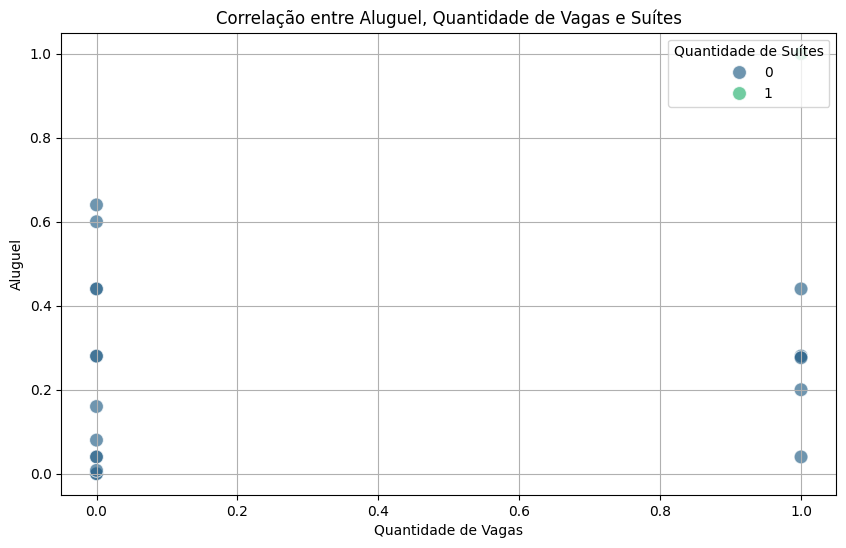

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico de correlação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaga', y='aluguel', hue='suite', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Correlação entre Aluguel, Quantidade de Vagas e Suítes')
plt.xlabel('Quantidade de Vagas')
plt.ylabel('Aluguel')
plt.legend(title='Quantidade de Suítes', loc='upper right')
plt.grid(True)
plt.show()


**Graficos de Barras**

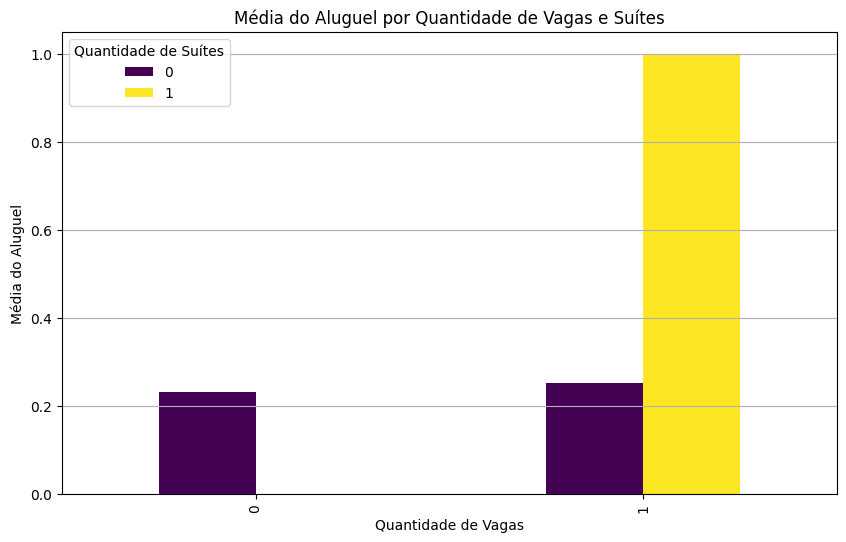

In [ ]:
# Calcular a média do aluguel por quantidade de vagas e quantidade de suítes
mean_rent = df.groupby(['vaga', 'suite'])['aluguel'].mean().unstack()

# Criar gráfico de barras
mean_rent.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Média do Aluguel por Quantidade de Vagas e Suítes')
plt.xlabel('Quantidade de Vagas')
plt.ylabel('Média do Aluguel')
plt.legend(title='Quantidade de Suítes')
plt.grid(True, axis='y')
plt.show()